In [ ]:
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 34.6 MB/s eta 0:00:00


In [ ]:
import pandas as p
import numpy as np
import tensorflow as tf
import os
import shutil
import matplotlib.pyplot as plt
from tensorflow import keras
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
path='/content/drive/MyDrive/lung_image_sets'
classes=os.listdir(path)
classes.pop()
classes

['lung_scc', 'lung_n', 'lung_aca', '.ipynb_checkpoints', 'train', 'val']

In [ ]:
#from glob import glob
#import cv2
#X=[]
#Y=[]
#for i,cat in enumerate(classes):
  #images=glob(f'{path}/{cat}/*.jpeg')
  #for image in images:
    #img=cv2.imread(image)
    #X.append(cv2.resize(img,(256,256)))
    #Y.append(i)
#X=np.asarray(X)
#one_hot_encoded_Y=p.get_dummies(Y).values

In [ ]:
#np.save('/content/drive/MyDrive/lung_image_sets/decoded_images/images_as_arrays',X)

In [ ]:
#np.save('/content/drive/MyDrive/lung_image_sets/decoded_images/one_hot_encoded_images',one_hot_encoded_Y)

In [ ]:
filepaths=[]
lablels=[]
for clas in classes:
  classpath=os.path.join(path,clas)
  classlist=os.listdir(classpath)
  for image in classlist:
    filepaths.append(os.path.join(classpath,image))
    lablels.append(clas)



KeyboardInterrupt: 

In [ ]:
len(filepaths)

14167

In [ ]:
labels=lablels
len(labels)

14167

In [ ]:
df=p.DataFrame({'filepaths':filepaths,'labels':labels})
df.loc[0].at["filepaths"]

'/content/drive/MyDrive/lung_image_sets/lung_scc/lungscc4592.jpeg'

In [ ]:
from sklearn.model_selection import train_test_split
train_split=.8
test_split=.1
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), ' test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  11333  test_df length:  1417   valid_df length:  1417


In [ ]:
os.mkdir('drive/MyDrive/lung_image_sets/train')
os.mkdir('drive/MyDrive/lung_image_sets/train/scc')
os.mkdir('drive/MyDrive/lung_image_sets/train/n')
os.mkdir('drive/MyDrive/lung_image_sets/train/aca')
train1=os.listdir('drive/MyDrive/lung_image_sets/lung_scc')
train2=os.listdir('drive/MyDrive/lung_image_sets/lung_n')
train3=os.listdir('drive/MyDrive/lung_image_sets/lung_aca')


dest_path1='drive/MyDrive/lung_image_sets/train/scc'
dest_path2='drive/MyDrive/lung_image_sets/train/n'
dest_path3='drive/MyDrive/lung_image_sets/train/aca'
for file in train1[:4000]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_scc',file),dest_path1)
for file in train2[:4000]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_n',file),dest_path2)
for file in train3[:4000]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_aca',file),dest_path3)


In [ ]:
os.mkdir('drive/MyDrive/lung_image_sets/test')
os.mkdir('drive/MyDrive/lung_image_sets/test/scc')
os.mkdir('drive/MyDrive/lung_image_sets/test/n')
os.mkdir('drive/MyDrive/lung_image_sets/test/aca')
val1=os.listdir('drive/MyDrive/lung_image_sets/lung_scc')
val2=os.listdir('drive/MyDrive/lung_image_sets/lung_n')
val3=os.listdir('drive/MyDrive/lung_image_sets/lung_aca')
dest_path1='drive/MyDrive/lung_image_sets/test/scc'
dest_path2='drive/MyDrive/lung_image_sets/test/n'
dest_path3='drive/MyDrive/lung_image_sets/test/aca'
for file in val1[4500:]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_scc',file),dest_path1)
for file in val2[4500:]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_n',file),dest_path2)
for file in val3[4500:]:
  shutil.copy(os.path.join('drive/MyDrive/lung_image_sets/lung_aca',file),dest_path3)

In [ ]:
#os.mkdir('drive/MyDrive/lung_image_sets/validation')
#os.mkdir('drive/MyDrive/lung_image_sets/test')
train_n=os.listdir('drive/MyDrive/lung_image_sets/test/n')
len(train_n)

0

In [ ]:
file1=os.listdir('drive/MyDrive/lung_image_sets/validation')
len(file1)

1417

In [ ]:
train='drive/MyDrive/lung_image_sets/train'
valid='drive/MyDrive/lung_image_sets/val'
test='drive/MyDrive/lung_image_sets/test'
batch_size=32
img_size=(224, 224)
def scalar(img):
    return img/127.5-1
gen=ImageDataGenerator(rescale=1./255)
train_gen=gen.flow_from_directory(train,target_size=img_size, class_mode='categorical',color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=gen.flow_from_directory( test,target_size=img_size, class_mode='categorical',color_mode='rgb', shuffle=False, batch_size=batch_size)
valid_gen=gen.flow_from_directory( valid,target_size=img_size, class_mode='categorical',color_mode='rgb', shuffle=True, batch_size=batch_size)


Found 12000 images belonging to 3 classes.
Found 1032 images belonging to 3 classes.
Found 1135 images belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True)
plateau=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1,min_lr=0.00001)

In [ ]:
#base_model=tf.keras.applications.EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128,3,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_gen,epochs=5,validation_data=valid_gen,callbacks=[early_stopping,plateau],verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 2862s 7s/step - accuracy: 0.7427 - loss: 0.6261 - val_accuracy: 0.8661 - val_loss: 0.3774 - learning_rate: 0.0010
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1133s 3s/step - accuracy: 0.8929 - loss: 0.2624 - val_accuracy: 0.8899 - val_loss: 0.2815 - learning_rate: 0.0010
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1106s 3s/step - accuracy: 0.9046 - loss: 0.2220 - val_accuracy: 0.9022 - val_loss: 0.2645 - learning_rate: 0.0010
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1107s 3s/step - accuracy: 0.9313 - loss: 0.1699 - val_accuracy: 0.8775 - val_loss: 0.2832 - learning_rate: 0.0010
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1092s 3s/step - accuracy: 0.9346 - loss: 0.1668 - val_accuracy: 0.9119 - val_loss: 0.2264 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [ ]:
import pickle
with open('drive/MyDrive/lung_image_sets/model/model_1.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
loss, accuracy = model.evaluate(test_gen)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 291s 9s/step - accuracy: 0.9376 - loss: 0.2099
Test Loss: 0.22078683972358704
Test Accuracy: 0.9215116500854492


In [ ]:
predictions = loaded_model.predict(test_gen)

# Get the class predictions (assuming output is a softmax or similar)
predicted_classes = predictions.argmax(axis=-1)
true_labels = test_gen.classes
predicted_classes
#Compare predicted and true labels
correct = predicted_classes == true_labels
accuracy = correct.sum() / len(true_labels)
print(f'Manual Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 233s 7s/step


array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import recall_score, f1_score
recall = recall_score(true_labels, predicted_classes, average='weighted')
print(f"Recall: {recall}")

# Compute F1 score
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

Recall: 0.9215116279069767
F1 Score: 0.9242430667500159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model's layers (optional: do this in the initial phase to prevent overfitting)
base_model.trainable = False

# Create the new model by adding custom layers on top of the base model
model = keras.models.Sequential([
    base_model,  # EfficientNetB0 as feature extractor
    GlobalAveragePooling2D(),  # Replaces Flatten to reduce parameters and prevent overfitting
    Dropout(0.3),
    Dense(128, activation='relu'),  # Custom dense layer
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (assuming `train_gen` and `valid_gen` are the data generators)
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=valid_gen,
    callbacks=[early_stopping, plateau],  # Make sure these callbacks are defined
    verbose=1
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
 16/375 ━━━━━━━━━━━━━━━━━━━━ 1:37:23 16s/step - accuracy: 0.3062 - loss: 1.1982

KeyboardInterrupt: 

In [ ]:
train_path_1='drive/MyDrive/lung_image_sets/train/aca'
train_path_2='drive/MyDrive/lung_image_sets/train/n'
train_path_3='drive/MyDrive/lung_image_sets/train/scc'
train_path_list=[train_path_1,train_path_2,train_path_3]


In [ ]:
import glob
file_list = []
for folder in train_path_list:
    files = glob.glob(folder + '/**/*', recursive=True)
    file_list.extend([file for file in files if os.path.isfile(file)])

In [ ]:
file_list[:10]

['drive/MyDrive/lung_image_sets/train/aca/lungaca1888.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1894.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1887.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1903.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1895.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1892.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1886.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1906.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1914.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca1936.jpeg']

In [ ]:
import random
random.shuffle(file_list)
file_list[:10]

['drive/MyDrive/lung_image_sets/train/n/lungn4224.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca2359.jpeg',
 'drive/MyDrive/lung_image_sets/train/n/lungn137.jpeg',
 'drive/MyDrive/lung_image_sets/train/scc/lungscc2979.jpeg',
 'drive/MyDrive/lung_image_sets/train/n/lungn4358.jpeg',
 'drive/MyDrive/lung_image_sets/train/scc/lungscc270.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca4525.jpeg',
 'drive/MyDrive/lung_image_sets/train/aca/lungaca4325.jpeg',
 'drive/MyDrive/lung_image_sets/train/n/lungn204.jpeg',
 'drive/MyDrive/lung_image_sets/train/scc/lungscc2587.jpeg']

In [ ]:
df=p.DataFrame(file_list,columns=['filepath'])
df.head()

,filepath
0,drive/MyDrive/lung_image_sets/train/n/lungn422...
1,drive/MyDrive/lung_image_sets/train/aca/lungac...
2,drive/MyDrive/lung_image_sets/train/n/lungn137...
3,drive/MyDrive/lung_image_sets/train/scc/lungsc...
4,drive/MyDrive/lung_image_sets/train/n/lungn435...


In [ ]:
df['label']=df['filepath'].apply(lambda x: x.split('/')[-2])
df.head()

,filepath,label
0,drive/MyDrive/lung_image_sets/train/n/lungn422...,n
1,drive/MyDrive/lung_image_sets/train/aca/lungac...,aca
2,drive/MyDrive/lung_image_sets/train/n/lungn137...,n
3,drive/MyDrive/lung_image_sets/train/scc/lungsc...,scc
4,drive/MyDrive/lung_image_sets/train/n/lungn435...,n


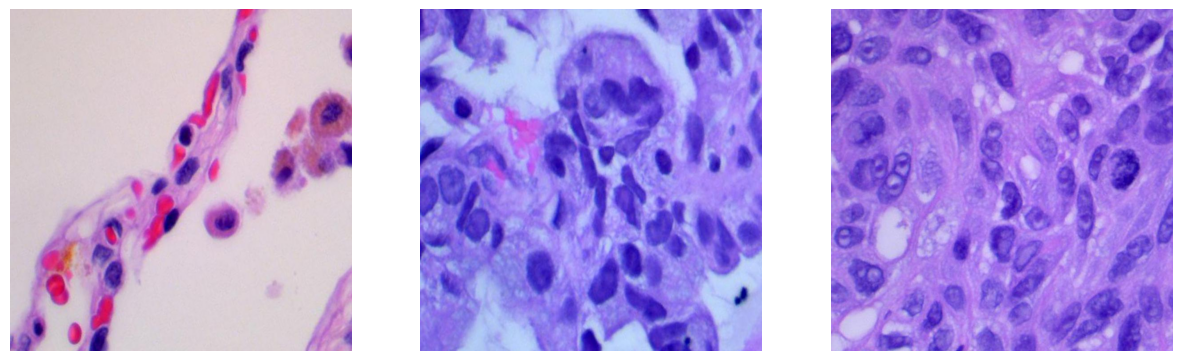

In [ ]:
import matplotlib.image as mpimg

# List of three image paths
image_paths = [
    'drive/MyDrive/lung_image_sets/train/n/lungn4224.jpeg',
    'drive/MyDrive/lung_image_sets/train/aca/lungaca2359.jpeg',
    'drive/MyDrive/lung_image_sets/train/scc/lungscc2979.jpeg'
]

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each image and display it
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)  # Load image
    axes[i].imshow(img)  # Display image
    axes[i].axis('off')  # Hide axes

# Show the plot with all three images
plt.show()

In [ ]:
import pickle

with open('drive/MyDrive/lung_image_sets/model/model_1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
import joblib

joblib.dump(loaded_model, 'drive/MyDrive/lung_image_sets/model/compressed_model_2.pkl', compress=9)

['drive/MyDrive/lung_image_sets/model/compressed_model_2.pkl']

In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,508,043 (127.82 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,696 (85.22 MB)

In [ ]:
import cv2
image=cv2.imread('drive/MyDrive/lung_image_sets/test/aca/lungaca1.jpeg')


In [ ]:
new_size = (224,224)
resized_img = cv2.resize(image, new_size)

In [ ]:
pred=loaded_model.predict(resized_img.reshape(1,224,224,3))
val=pred.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
class_indices = test_gen.class_indices  # You can get this from the generator
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Get the predicted class label
predicted_label = class_labels[val[0]]
print(f"Predicted Label: {predicted_label}")


Predicted Label: n


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 280s 9s/step


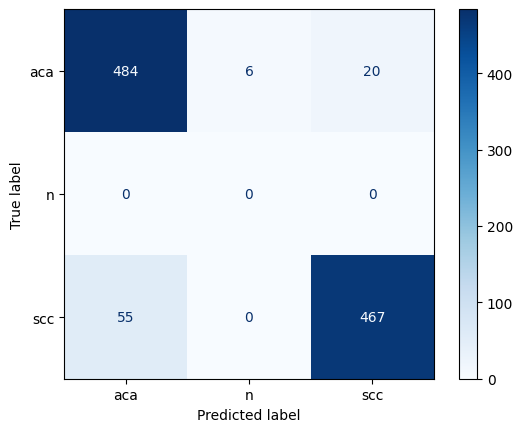

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
# Assuming you are using `test_gen` for the test data
y_pred_probs = loaded_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Step 2: Get true labels from the generator
# Depending on how your generator is set up, you may extract true labels like this
y_true = test_gen.classes  # Assuming `test_gen` has `classes` attribute

# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the confusion matrix
class_names = test_gen.class_indices.keys()  # Get class names from generator

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()